# Домашнее задание № 2. Мешок слов

## Задание 1 (3 балла)

У векторайзеров в sklearn есть встроенная токенизация на регулярных выражениях. Найдите способо заменить её на кастомную токенизацию

Обучите векторайзер с дефолтной токенизацией и с токенизацией razdel.tokenize. Обучите классификатор (любой) с каждым из векторизаторов. Сравните метрики и выберете победителя. 

(в вашей тетрадке должен быть код обучения и все метрики; если вы сдаете в .py файлах то сохраните полученные метрики в отдельном файле или в комментариях)

In [1]:
import pandas as pd
import sklearn as sklearn
from razdel import tokenize
from sklearn.feature_extraction.text import CountVectorizer

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics.pairwise import cosine_distances, cosine_similarity

from IPython.display import Image
from IPython.core.display import HTML

In [2]:
data = pd.read_csv('labeled.csv')

In [3]:
data.head()

,comment,toxic
0,"Верблюдов-то за что? Дебилы, бл...\n",1.0
1,"Хохлы, это отдушина затюканого россиянина, мол...",1.0
2,Собаке - собачья смерть\n,1.0
3,"Страницу обнови, дебил. Это тоже не оскорблени...",1.0
4,"тебя не убедил 6-страничный пдф в том, что Скр...",1.0


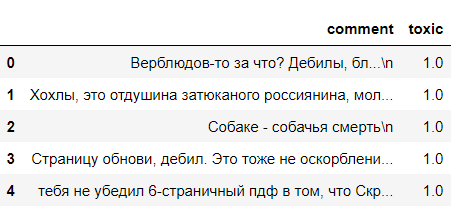

In [4]:
data.toxic.value_counts(normalize=True)

0.0    0.66514
1.0    0.33486
Name: toxic, dtype: float64

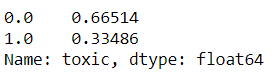

In [5]:
train, test = train_test_split(data, test_size=0.3, shuffle=True)

train.reset_index(inplace=True)
test.reset_index(inplace=True)

In [6]:
vectorizer = CountVectorizer()

X = vectorizer.fit_transform(train.comment)
print(vectorizer.vocabulary_)
print(vector.shape)
print(type(vector))
print(vector.toarray())

{'закон': 14289, 'сохранения': 44734, 'энергии': 54035, 'рулит': 41296, 'ножки': 26553, 'не': 25330, 'имеют': 16348, 'никакой': 26349, 'ценности': 52234, 'они': 28273, 'просто': 38040, 'удерживают': 49231, 'рабочую': 38958, 'арматуру': 3117, 'очень': 30158, 'жаль': 13169, 'за': 13621, 'нишу': 26439, 'сегодня': 42383, 'коллегой': 18538, 'это': 54172, 'как': 17299, 'раз': 39067, 'обсуждали': 27473, 'маркетолог': 21987, 'искренне': 16866, 'сожалею': 44256, 'что': 52878, 'большинства': 4670, 'людей': 21535, 'такое': 46952, 'превратное': 35720, 'представление': 35941, 'том': 47832, 'маркетинг': 21978, 'между': 22349, 'тем': 47307, 'целая': 52165, 'область': 27081, 'профессия': 38192, 'ее': 12990, 'цель': 52192, 'вовсе': 6769, 'впарить': 7335, 'вам': 5437, 'говно': 9423, 'по': 32374, 'цене': 52211, 'шоколадки': 53439, 'позволяет': 33540, 'продавать': 37401, 'сути': 46529, 'важно': 5362, 'то': 47714, 'им': 16312, 'инструментом': 16593, 'продаж': 37417, 'пользуются': 34199, 'недобросовестные':

NameError: name 'vector' is not defined

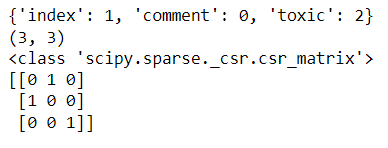

In [7]:
X.shape
#(10088, 54561)

(10088, 54554)

In [8]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(train.comment)
X_test = vectorizer.transform(test.comment) 

In [9]:
y = train.toxic.values
y_test = test.toxic.values

In [10]:
clf = LogisticRegression(C=0.1, class_weight='balanced')

In [11]:
clf.fit(X, y)

LogisticRegression(C=0.1, class_weight='balanced')

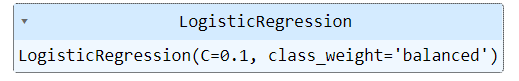

In [12]:
clf.classes_

array([0., 1.])

In [13]:
preds = clf.predict(X_test)

Я не уверена, что этот шаг нужен для обучения (скорее всего нет), но стало интересно, что получится:

In [14]:
sklearn.linear_model.LogisticRegression(test)

LogisticRegression(penalty=      index                                            comment  toxic
0     10183                      Зато как хороша вокалистка!\n    1.0
1     11281  Отображение времени с высокой точностью... сре...    0.0
2      8058  Что плохого?) Я просто общалась там от скуки, ...    0.0
3     13172  но есть аналоги, по моему, батончик-суфле за 4...    0.0
4      6272  Ватник всегда антисемит. Пидорахи всегда детек...    1.0
...     ...                                                ...    ...
4319   4526  Да гомофобам плевать на достоверность, на пруф...    1.0
4320    157  Например вот тут: https: www.google.ru url?sa ...    0.0
4321   6991  Для справки: в конце Противостояния Стив отпра...    0.0
4322   7258  Такую фигню можно из обычных мешков от картошк...    0.0
4323  11778  Легендарный сорофан . Для 10-15га самое то, и ...    0.0

[4324 rows x 3 columns])

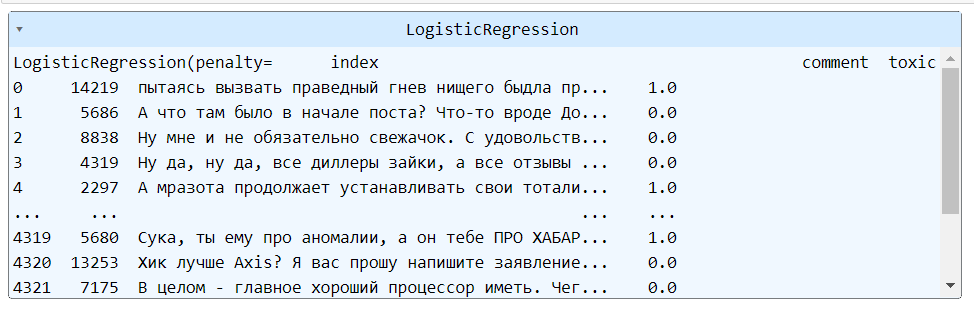

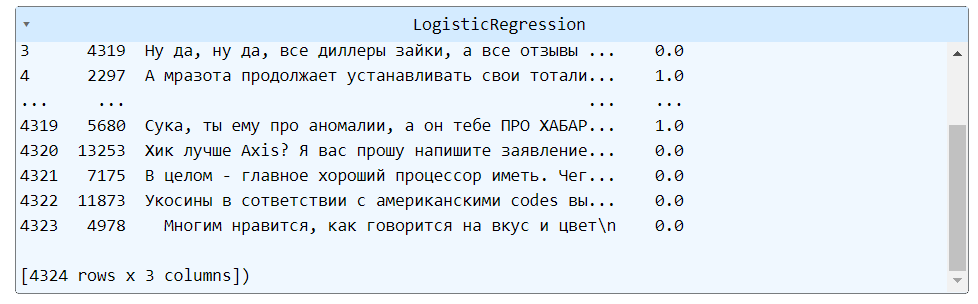

Метрики:

In [15]:
print(classification_report(y_test, preds, zero_division=0))

              precision    recall  f1-score   support

         0.0       0.91      0.82      0.87      2898
         1.0       0.70      0.84      0.76      1426

    accuracy                           0.83      4324
   macro avg       0.81      0.83      0.81      4324
weighted avg       0.84      0.83      0.83      4324



Результаты нескольких запусков:

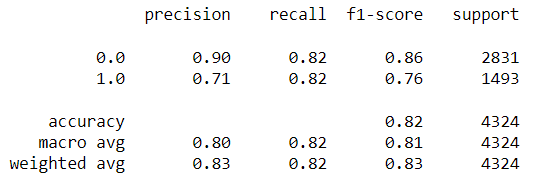

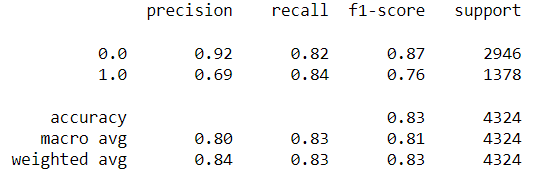

А теперь попробуем настроить кастомный токенизатор

In [16]:
import razdel
from razdel import tokenize
def my_tokenizer(text):
    tokens = list(tokenize(text))
    return [_.text for _ in tokens]

vectorizer = CountVectorizer(tokenizer=my_tokenizer)
matrix = vectorizer.fit_transform(train.comment)

print(vectorizer.vocabulary_)
print(vector.shape)
print(type(vector))
print(vector.toarray())

words_df = pd.DataFrame(matrix.toarray(),
                        columns=vectorizer.get_feature_names())
words_df

{'закон': 14651, 'сохранения': 45366, 'энергии': 54798, 'рулит': 41899, 'ножки': 27053, 'не': 25820, 'имеют': 16724, 'никакой': 26846, 'ценности': 52950, 'они': 28779, 'просто': 38625, 'удерживают': 49922, 'рабочую': 39546, 'арматуру': 3376, '.': 77, 'очень': 30673, 'жаль': 13525, 'за': 13986, 'нишу': 26938, 'сегодня': 42999, 'с': 42122, 'коллегой': 18980, 'это': 54930, 'как': 17686, 'раз': 39656, 'обсуждали': 27974, 'я': 55089, '-': 22, 'маркетолог': 22446, 'искренне': 17251, 'сожалею': 44886, ',': 21, 'что': 53616, 'у': 49515, 'большинства': 4948, 'людей': 21990, 'такое': 47614, 'превратное': 36302, 'представление': 36524, 'о': 27360, 'том': 48509, 'маркетинг': 22437, 'между': 22813, 'тем': 47977, 'целая': 52880, 'область': 27580, 'профессия': 38778, 'и': 16203, 'ее': 13342, 'цель': 52907, 'вовсе': 7054, 'впарить': 7625, 'вам': 5715, 'говно': 9750, 'по': 32911, 'цене': 52927, 'шоколадки': 54193, 'позволяет': 34105, 'продавать': 37983, 'сути': 47179, 'важно': 5639, 'то': 48385, 'им': 

NameError: name 'vector' is not defined

In [ ]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(train.comment)
X_test = vectorizer.transform(test.comment) 

In [ ]:
y = train.toxic.values
y_test = test.toxic.values

In [ ]:
clf = LogisticRegression(C=0.1, class_weight='balanced')

In [17]:
clf.fit(X, y)

LogisticRegression(C=0.1, class_weight='balanced')

In [18]:
clf.classes_

array([0., 1.])

In [19]:
preds = clf.predict(X_test)

In [20]:
sklearn.linear_model.LogisticRegression(test)

LogisticRegression(penalty=      index                                            comment  toxic
0     10183                      Зато как хороша вокалистка!\n    1.0
1     11281  Отображение времени с высокой точностью... сре...    0.0
2      8058  Что плохого?) Я просто общалась там от скуки, ...    0.0
3     13172  но есть аналоги, по моему, батончик-суфле за 4...    0.0
4      6272  Ватник всегда антисемит. Пидорахи всегда детек...    1.0
...     ...                                                ...    ...
4319   4526  Да гомофобам плевать на достоверность, на пруф...    1.0
4320    157  Например вот тут: https: www.google.ru url?sa ...    0.0
4321   6991  Для справки: в конце Противостояния Стив отпра...    0.0
4322   7258  Такую фигню можно из обычных мешков от картошк...    0.0
4323  11778  Легендарный сорофан . Для 10-15га самое то, и ...    0.0

[4324 rows x 3 columns])

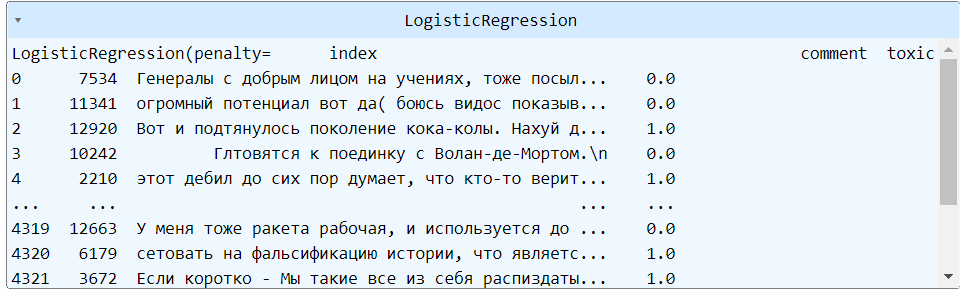

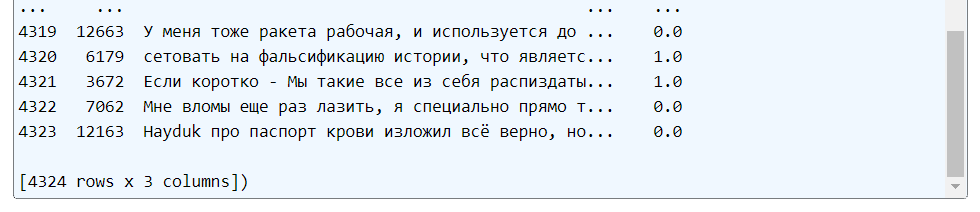

In [21]:
print(classification_report(y_test, preds, zero_division=0))

              precision    recall  f1-score   support

         0.0       0.91      0.82      0.87      2898
         1.0       0.70      0.84      0.76      1426

    accuracy                           0.83      4324
   macro avg       0.81      0.83      0.81      4324
weighted avg       0.84      0.83      0.83      4324



Если сначала запускать кастомный токенайзер, то выдаются разные результаты. В любом случае нетоксичность определяется лучше токсичности, но метрики везде низкие.

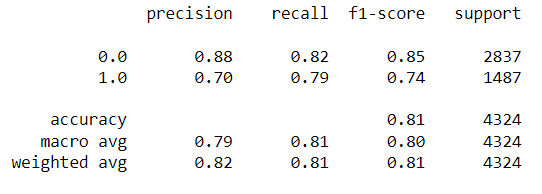

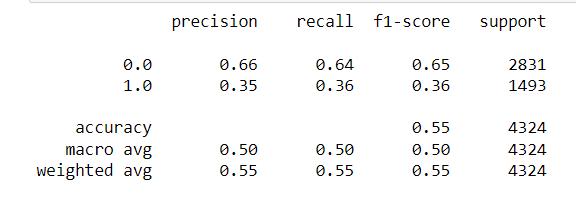

А если запустить последовательно, после обучения со встроенным токенайзером, будет такой же результат.

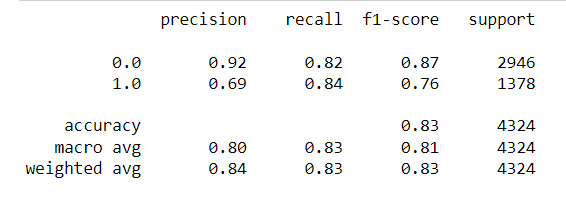

В любом случае, побеждает встроенный токенайзер CountVectorizer

## Задание 2 (3 балла)

Преобразуйте таблицу с абсолютными частотностями в семинарской тетрадке в таблицу с tfidf значениями. (Таблица - https://i.ibb.co/r5Nc2HC/abs-bow.jpg) Формула tfidf есть в семинаре на картнике с пояснениями на английском. 
Считать нужно в питоне. Формат итоговой таблицы может быть любым, главное, чтобы был код и можно было воспроизвести вычисления. 

In [22]:
from sklearn import feature_extraction

In [23]:
from sklearn.feature_extraction.text import CountVectorizer

In [26]:
texts = ['я и ты', 'ты и я', 'я, я и только я', 'только не я', 'он']  
cv = CountVectorizer()
cv_fit = cv.fit_transform(texts)
print(cv.get_feature_names_out())
print(cv_fit.toarray())

['не' 'он' 'только' 'ты']
[[0 0 0 1]
 [0 0 0 1]
 [0 0 1 0]
 [1 0 1 0]
 [0 1 0 0]]


почему не считаются "я", "и", "не" - загадка. видимо, отфильтровываются как стоп-слова?? в любом случае, кажется, дальнейший запуск tf-idf не имеет смысла, потому что табличку не воспроизводит (но я его всё равно сделаю).

In [27]:
from sklearn.feature_extraction.text import TfidfTransformer  

transformer = TfidfTransformer()  
print (transformer)  
tfidf = transformer.fit_transform(X)  
print (tfidf.toarray())  

TfidfTransformer()
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


теперь попробуем посчитать с помощью формулы

In [213]:
#загружаем таблицу
data = pd.read_csv('tolko_ne_on.csv')

In [214]:
data.head()

,;я;ты;и;только;не;он
0,я и ты;1;1;1;0;0;0
1,ты и я;1;1;1;0;0;0
2,я я и только я;3;0;1;1;0;0
3,только не я;1;0;0;1;1;0
4,он;0;0;0;0;0;1


In [157]:
data = dict(я = [1, 1, 3, 1, 0] , ты = [1, 1, 0, 0, 0], и = [1, 1, 1, 0, 0, 0], только = [0, 0, 1, 1, 0], не = [0, 0, 0, 0, 1, 0], он = [0, 0, 0, 0, 1])
texts = [['я и ты'], ['ты и я'], ['я , я и только я'], ['только не я'], ['он']]
data.get('я')[1]

import math
import re


def tfidf(x):
    w = float(x)*(math.log(5/q))
    return(round(w, 4))
datalist = list(data)
print(datalist)

l = 0

for i in datalist:
    a = data.get(i)
    q = len(list(filter(lambda num: num !=0, a)))
    if l<= len(texts):
        print(texts[l], end =' ')
    l+=1
    for x in a:
        j = tfidf(x)
        print(j, end = '    ')
    print('\n')

['я', 'ты', 'и', 'только', 'не', 'он']
['я и ты'] 0.2231    0.2231    0.6694    0.2231    0.0    

['ты и я'] 0.9163    0.9163    0.0    0.0    0.0    

['я , я и только я'] 0.5108    0.5108    0.5108    0.0    0.0    0.0    

['только не я'] 0.0    0.0    0.9163    0.9163    0.0    

['он'] 0.0    0.0    0.0    0.0    1.6094    0.0    



IndexError: list index out of range

## Задание 3 (2 балла)

Обучите 2 любых разных классификатора из семинара. Предскажите токсичность для текстов из тестовой выборки (используйте одну и ту же выборку для обоих классификаторов) и найдите 10 самых токсичных для каждого из классификаторов. Сравните получаемые тексты - какие тексты совпадают, какие отличаются, правда ли тексты токсичные?

Требования к моделям:   
а) один классификатор должен использовать CountVectorizer, другой TfidfVectorizer  
б) у векторазера должны быть вручную заданы как минимум 5 параметров (можно ставить разные параметры tfidfvectorizer и countvectorizer)  
в) у классификатора должно быть задано вручную как минимум 2 параметра (по возможности)  
г)  f1 мера каждого из классификаторов должна быть минимум 0.75  

*random_seed не считается за параметр

1. CountVectorizer+LogisticRegression

In [232]:
import pandas as pd
import sklearn as sklearn
from razdel import tokenize
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics.pairwise import cosine_distances, cosine_similarity

from IPython.display import Image
from IPython.core.display import HTML

In [233]:
data = pd.read_csv('labeled.csv')

In [234]:
data.head()

,comment,toxic
0,"Верблюдов-то за что? Дебилы, бл...\n",1.0
1,"Хохлы, это отдушина затюканого россиянина, мол...",1.0
2,Собаке - собачья смерть\n,1.0
3,"Страницу обнови, дебил. Это тоже не оскорблени...",1.0
4,"тебя не убедил 6-страничный пдф в том, что Скр...",1.0


In [235]:
data.toxic.value_counts(normalize=True)

0.0    0.66514
1.0    0.33486
Name: toxic, dtype: float64

In [236]:
train, test = train_test_split(data, test_size=0.3, shuffle=True)

train.reset_index(inplace=True)
test.reset_index(inplace=True)

In [237]:
vectorizer = CountVectorizer(decode_error = 'replace', strip_accents = 'unicode', lowercase = False, max_df=0.9, max_features=54581)

X = vectorizer.fit_transform(train.comment)
X_test = vectorizer.transform(test.comment) 

In [238]:
y = train.toxic.values
y_test = test.toxic.values

In [239]:
clf = LogisticRegression(C=0.1, class_weight='balanced')

In [240]:
clf.fit(X, y)

LogisticRegression(C=0.1, class_weight='balanced')

In [241]:
clf.classes_

array([0., 1.])

In [242]:
preds = clf.predict(X_test)

In [243]:
print(classification_report(y_test, preds, zero_division=0))

              precision    recall  f1-score   support

         0.0       0.90      0.82      0.86      2896
         1.0       0.69      0.83      0.75      1428

    accuracy                           0.82      4324
   macro avg       0.80      0.82      0.80      4324
weighted avg       0.83      0.82      0.82      4324



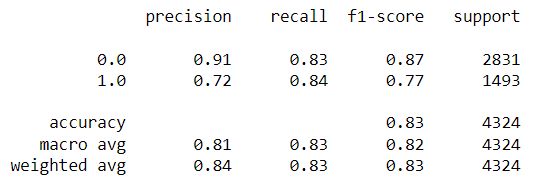

2. TfidfVectorizer + RandomForestClassifier

In [65]:
vectorizer2 = TfidfVectorizer(decode_error = 'replace', strip_accents = 'unicode', lowercase = True, max_df=1.0, max_features=54571)
X = vectorizer2.fit_transform(train.comment)

In [66]:
vectorizer2 = TfidfVectorizer()
X = vectorizer2.fit_transform(train.comment)
X_test = vectorizer2.transform(test.comment) 

In [67]:
y = train.toxic.values
y_test = test.toxic.values

In [144]:
clf = RandomForestClassifier(n_estimators=100, criterion='log_loss', min_samples_leaf=2, class_weight='balanced', bootstrap=False)

In [145]:
clf.fit(X, y)

RandomForestClassifier(bootstrap=False, class_weight='balanced',
                       criterion='log_loss', min_samples_leaf=2)

In [146]:
clf.classes_

array([0., 1.])

In [147]:
preds = clf.predict(X_test)

In [148]:
print(classification_report(y_test, preds, zero_division=0))

              precision    recall  f1-score   support

         0.0       0.85      0.88      0.86      2904
         1.0       0.73      0.68      0.70      1420

    accuracy                           0.81      4324
   macro avg       0.79      0.78      0.78      4324
weighted avg       0.81      0.81      0.81      4324



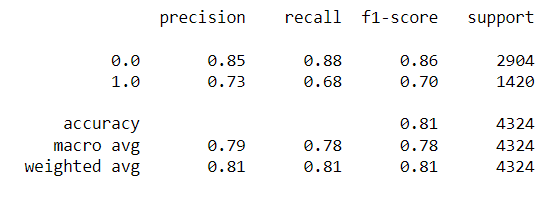

## *Задание 4 (2 балла)

Для классификаторов LogisticRegression и Random Forest найдите способ извлечь важность признаков для предсказания токсичного класса. Сопоставьте полученные числа со словами (или нграммами) в словаре и найдите топ - 5 "токсичных" слов для каждого из классификаторов. 

Важное требование: в топе не должно быть стоп-слов. Для этого вам нужно будет правильным образом настроить векторизацию.

кажется, это совсем не то(

In [182]:
import pandas as pd
columns = ['index', 'comment', 'toxic']
data = pd.read_csv('labeled.csv')
display(data.head())
display(data.info())
display(data.isna().sum())
display(data.describe())

,comment,toxic
0,"Верблюдов-то за что? Дебилы, бл...\n",1.0
1,"Хохлы, это отдушина затюканого россиянина, мол...",1.0
2,Собаке - собачья смерть\n,1.0
3,"Страницу обнови, дебил. Это тоже не оскорблени...",1.0
4,"тебя не убедил 6-страничный пдф в том, что Скр...",1.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14412 entries, 0 to 14411
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   comment  14412 non-null  object 
 1   toxic    14412 non-null  float64
dtypes: float64(1), object(1)
memory usage: 225.3+ KB


None

comment    0
toxic      0
dtype: int64

,toxic
count,14412.000000
mean,0.334860
std,0.471958
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [183]:
data.toxic.value_counts(normalize=True)

0.0    0.66514
1.0    0.33486
Name: toxic, dtype: float64

In [184]:
vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(train.comment)
X_test = vectorizer.transform(test.comment)

In [185]:
y_train = train.toxic.values
y_test = test.toxic.values

In [186]:
import numpy as np
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)
y_train = np.array(y_train)

ValueError: Cannot center sparse matrices: pass `with_mean=False` instead. See docstring for motivation and alternatives.

In [187]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import recall_score
rfc = RandomForestClassifier()
rfc.fit(X, y)
display(rfc.score(X, y))

0.9975218080888184

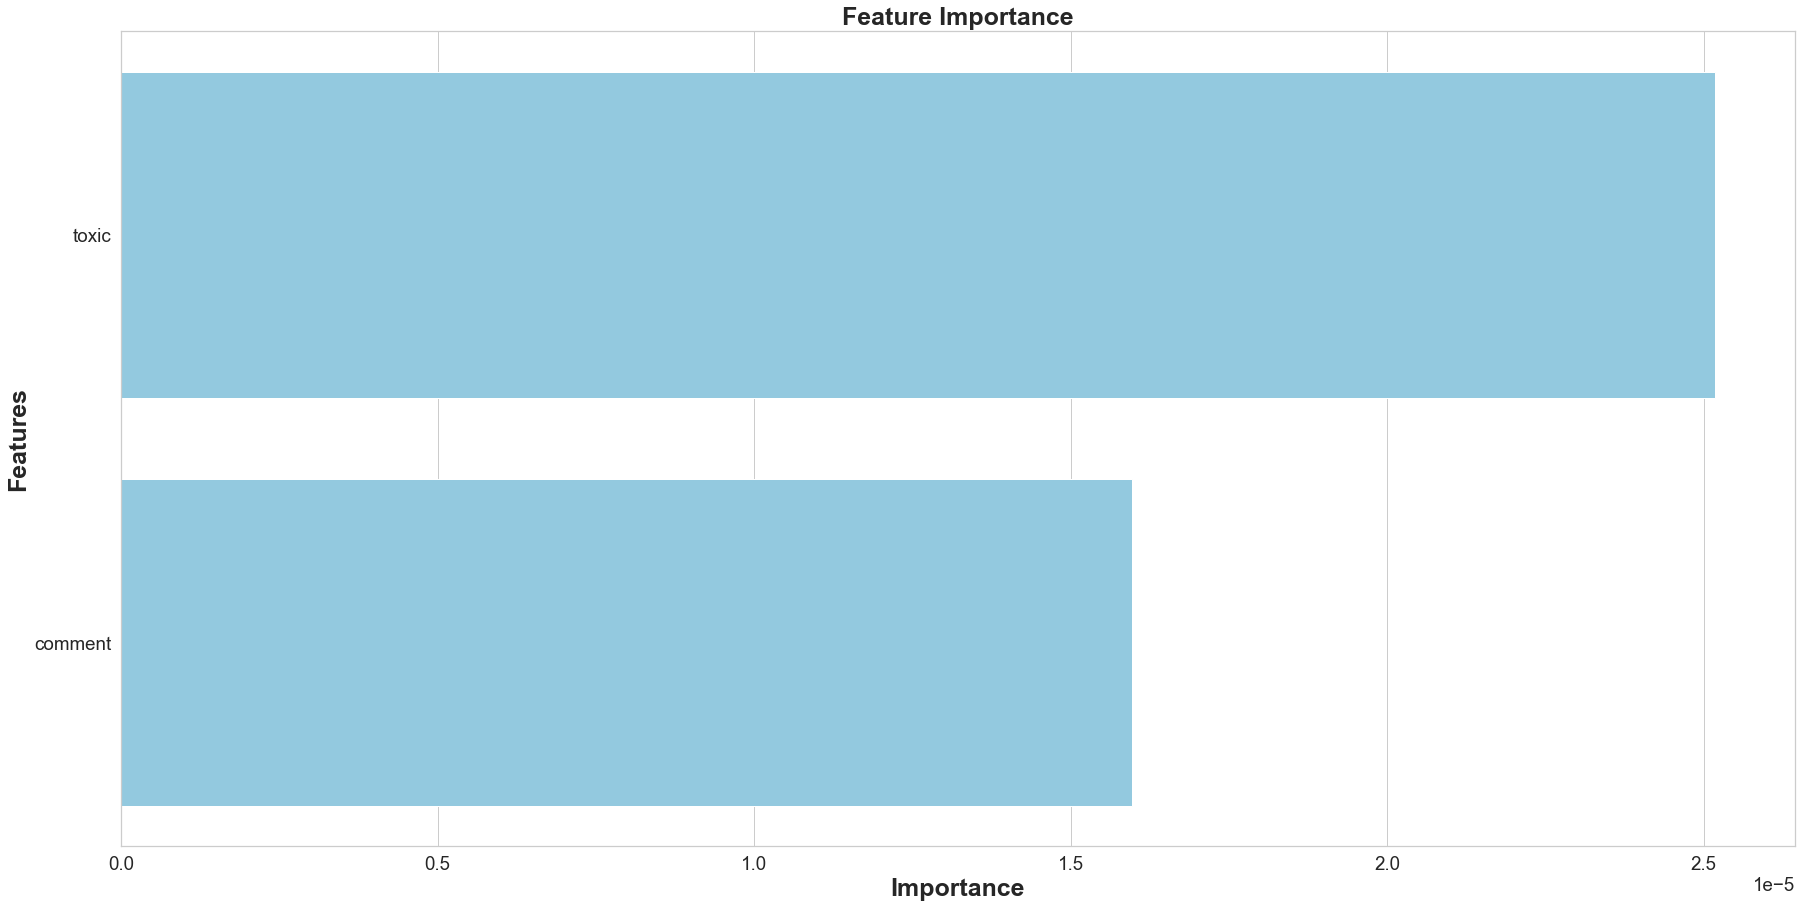

None

,Features,Gini-Importance
0,toxic,0.000025
1,comment,0.000016


In [188]:
import seaborn as sns
import matplotlib.pyplot as plt
feats = {}
for feature, importance in zip(data.columns, rfc.feature_importances_):
    feats[feature] = importance
importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-Importance'})
importances = importances.sort_values(by='Gini-Importance', ascending=False)
importances = importances.reset_index()
importances = importances.rename(columns={'index': 'Features'})
sns.set(font_scale = 5)
sns.set(style="whitegrid", color_codes=True, font_scale = 1.7)
fig, ax = plt.subplots()
fig.set_size_inches(30,15)
sns.barplot(x=importances['Gini-Importance'], y=importances['Features'], data=importances, color='skyblue')
plt.xlabel('Importance', fontsize=25, weight = 'bold')
plt.ylabel('Features', fontsize=25, weight = 'bold')
plt.title('Feature Importance', fontsize=25, weight = 'bold')
display(plt.show())
display(importances)

In [189]:
rfc.feature_importances_

array([1.59692023e-05, 2.51792809e-05, 8.15002951e-06, ...,
       0.00000000e+00, 9.68717728e-06, 2.41806936e-07])

In [191]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
pca_test = PCA(n_components=30)
pca_test.fit(X_train_scaled)
sns.set(style='whitegrid')
plt.plot(np.cumsum(pca_test.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.axvline(linewidth=4, color='r', linestyle = '--', x=10, ymin=0, ymax=1)
display(plt.show())
evr = pca_test.explained_variance_ratio_
cvr = np.cumsum(pca_test.explained_variance_ratio_)
pca_df = pd.DataFrame()
pca_df['Cumulative Variance Ratio'] = cvr
pca_df['Explained Variance Ratio'] = evr
display(pca_df.head(10))

NameError: name 'X_train_scaled' is not defined